In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
patient_df = pd.read_csv("dataset\patients_data_clean.csv")
patient_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\BAJRACHARYAA\AppData\Local\Temp\ipykernel_7716\199867789.py:1: SyntaxWarning: invalid escape sequence '\p'
  patient_df = pd.read_csv("dataset\patients_data_clean.csv")


,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes
0,2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92
4,2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104


In [7]:
avg_cost_by_gender = patient_df.groupby("Gender")["Total_Cost"].mean()
avg_cost_by_gender

Gender
Female    2627.048550
Male      2625.128996
Name: Total_Cost, dtype: float64

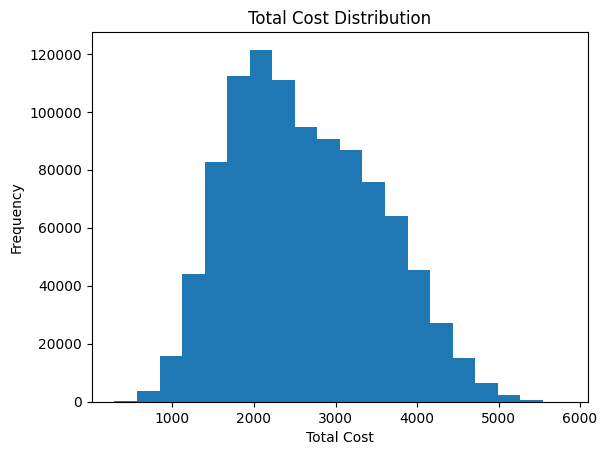

In [11]:
plt.hist(patient_df["Total_Cost"], bins=20)
plt.title("Total Cost Distribution")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()

In [15]:
avg_cost_by_insurance = patient_df[patient_df["Has_Insurance"] == True]["Total_Cost"].mean()
print(avg_cost_by_insurance)

1875.4243560527416


In [16]:
avg_cost_by_insurance = patient_df[patient_df["Has_Insurance"] != True]["Total_Cost"].mean()
print(avg_cost_by_insurance)

3126.0332134366477


In [17]:
patient_df["Visit_Date"] = pd.to_datetime(patient_df["Visit_Date"])
patient_df.set_index("Visit_Date", inplace=True)
annual_total_cost = patient_df["Total_Cost"].resample("Y").sum()
annual_total_cost

C:\Users\BAJRACHARYAA\AppData\Local\Temp\ipykernel_7716\983712076.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_total_cost = patient_df["Total_Cost"].resample("Y").sum()


Visit_Date
2018-12-31    524929838.0
2019-12-31    525546396.0
2020-12-31    527611664.0
2021-12-31    524564712.0
2022-12-31    523435956.0
Freq: YE-DEC, Name: Total_Cost, dtype: float64

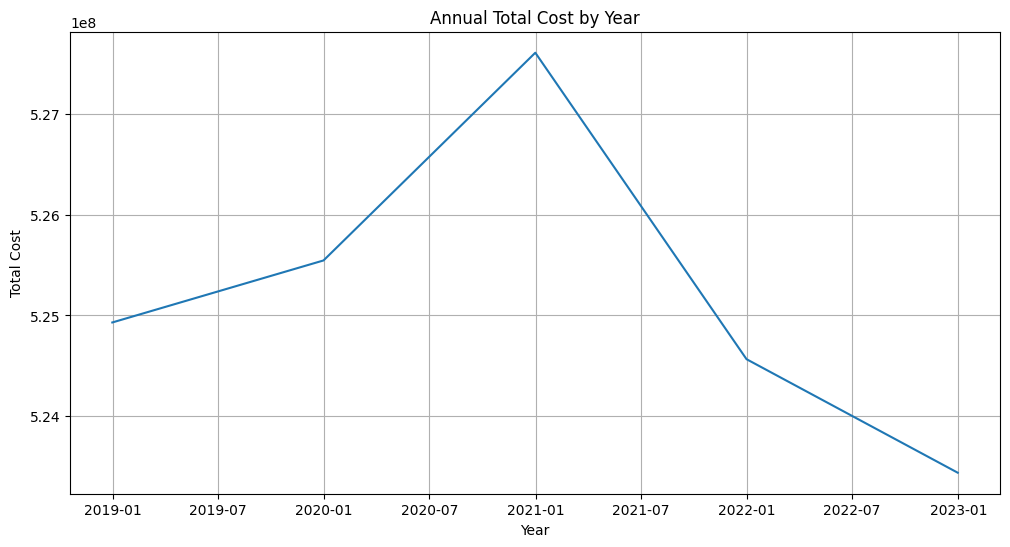

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(annual_total_cost.index, annual_total_cost.values)
plt.title("Annual Total Cost by Year")
plt.xlabel("Year")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()

In [21]:
has_insurance_true_data = patient_df[patient_df["Has_Insurance"] == True]["Total_Cost"].resample("Y").sum()
has_insurance_false_data = patient_df[patient_df["Has_Insurance"] == False]["Total_Cost"].resample("Y").sum()
print(has_insurance_true_data, has_insurance_false_data)

C:\Users\BAJRACHARYAA\AppData\Local\Temp\ipykernel_7716\1441292874.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  has_insurance_true_data = patient_df[patient_df["Has_Insurance"] == True]["Total_Cost"].resample("Y").sum()
C:\Users\BAJRACHARYAA\AppData\Local\Temp\ipykernel_7716\1441292874.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  has_insurance_false_data = patient_df[patient_df["Has_Insurance"] == False]["Total_Cost"].resample("Y").sum()


Visit_Date
2018-12-31    150240318.0
2019-12-31    150282846.0
2020-12-31    149892114.0
2021-12-31    149668092.0
2022-12-31    149638146.0
Freq: YE-DEC, Name: Total_Cost, dtype: float64 Visit_Date
2018-12-31    374689520.0
2019-12-31    375263550.0
2020-12-31    377719550.0
2021-12-31    374896620.0
2022-12-31    373797810.0
Freq: YE-DEC, Name: Total_Cost, dtype: float64


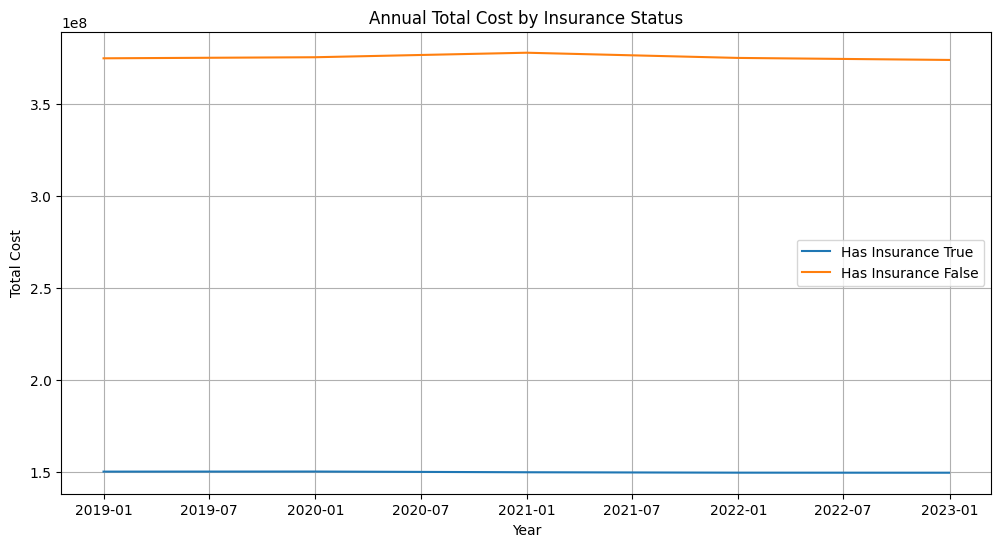

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(has_insurance_true_data.index, has_insurance_true_data.values, label="Has Insurance True")
plt.plot(has_insurance_false_data.index, has_insurance_false_data.values, label="Has Insurance False")
plt.title("Annual Total Cost by Insurance Status")
plt.xlabel("Year")
plt.ylabel("Total Cost")
plt.grid(True)
plt.legend()
plt.show()